<a href="https://colab.research.google.com/github/JUANBECERRIL003/EDP-2/blob/main/Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Colocación (Ejercicio 5.1)

Se busca aproximar la solución del problema de valor inicial:
$$u'' + u = x$$
Sujeto a: $u(0)=0$ y $u'(0)=2$.

Proponemos una solución aproximada de forma cúbica:
$$u_N(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3$$

**Pasos:**
1. Determinar $\alpha_0$ y $\alpha_1$ usando las condiciones iniciales.
2. Definir el residuo $\epsilon = u_N'' + u_N - x$.
3. Forzar que el residuo sea cero en los puntos de colocación $x = 1/2$ y $x = 1$ para encontrar $\alpha_2$ y $\alpha_3$.
4. Comparar con la solución exacta y calcular el error.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#variables
x = sp.symbols('x')
a0, a1, a2, a3 = sp.symbols('a0 a1 a2 a3')

u_N = a0 + a1*x + a2*x**2 + a3*x**3 #Definiendo la aproximación u_N, o sea el polinomio cúbico
#Derivada
du_N = sp.diff(u_N, x)

"""i.-Condiciones iniciales
u(0) = 0"""
eq_ic1 = u_N.subs(x, 0) - 0
#u'(0) = 2
eq_ic2 = du_N.subs(x, 0) - 2
#Resolvemos para a0 y a1
sol_ic = sp.solve([eq_ic1, eq_ic2], (a0, a1))
print(f"Coeficientes por condiciones iniciales: {sol_ic}")

#Actualizamos u_N con los valores encontrados
u_N = u_N.subs(sol_ic)
print(f"Forma actualizada de u_N: {u_N}")

"""ii.-Definir el Residuo
La EDO es u'' + u = x  --->  u'' + u - x = 0"""
residuo = sp.diff(u_N, x, 2) + u_N - x
print(f"Ecuación del Residuo (epsilon): {residuo}")

"""Aplicando el método de colocación para encontrar a2 y a3
puntos de colocación dados: x = 1/2 y x = 1
El residuo debe ser CERO en esos puntos."""

eq_col1 = residuo.subs(x, sp.Rational(1, 2)) #Rational para exactitud
eq_col2 = residuo.subs(x, 1)

print("\nSistema de Ecuaciones para Colocación:")
print(f"En x=1/2: {eq_col1} = 0")
print(f"En x=1:   {eq_col2} = 0")

#Resolviendo el sistema
sol_col = sp.solve([eq_col1, eq_col2], (a2, a3))
print(f"\nSolución para coeficientes restantes: {sol_col}")

#Sustituimos para tener la solución numérica final
u_numerica = u_N.subs(sol_col)
print(f"SOLUCIÓN NUMÉRICA FINAL u_N(x): {u_numerica}")

Coeficientes por condiciones iniciales: {a0: 0, a1: 2}
Forma actualizada de u_N: a2*x**2 + a3*x**3 + 2*x
Ecuación del Residuo (epsilon): a2*x**2 + a3*x**3 + x + 2*(a2 + 3*a3*x)

Sistema de Ecuaciones para Colocación:
En x=1/2: 9*a2/4 + 25*a3/8 + 1/2 = 0
En x=1:   3*a2 + 7*a3 + 1 = 0

Solución para coeficientes restantes: {a2: -1/17, a3: -2/17}
SOLUCIÓN NUMÉRICA FINAL u_N(x): -2*x**3/17 - x**2/17 + 2*x


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2971372622.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_vals, y_exact, 'r-', label='Solución Exacta ($u = x + \sin(x)$)', linewidth=2)


Solución Exacta Analítica: x + sin(x)


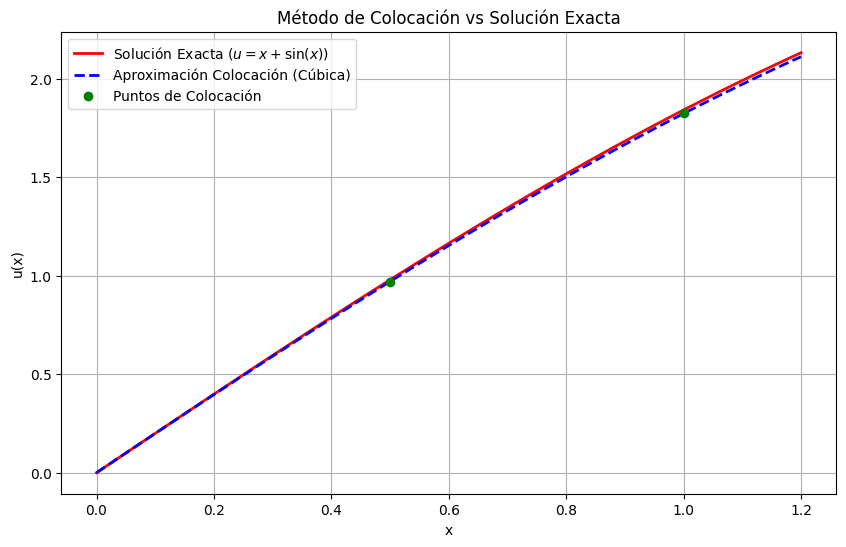


--- Tabla de Errores ---
x          | u_Numerica      | u_Exacta        | Error Abs      
------------------------------------------------------------
0.25       | 0.494485        | 0.497404        | 2.918665e-03   
0.50       | 0.970588        | 0.979426        | 8.837303e-03   
0.75       | 1.417279        | 1.431639        | 1.435935e-02   
1.00       | 1.823529        | 1.841471        | 1.794157e-02   


In [2]:
"""Solución exacta
Definimos la función u(x) para dsolve"""
u = sp.Function('u')(x)
edo = u.diff(x, 2) + u - x#u'' + u - x = 0

#Resolviendo la edo exacta con condiciones iniciales u(0):0, u'(0):2
sol_exacta_general = sp.dsolve(edo, u, ics={u.subs(x, 0): 0, u.diff(x).subs(x, 0): 2})
u_exacta = sol_exacta_general.rhs # Tomamos solo la parte derecha de la ecuación
print(f"Solución Exacta Analítica: {u_exacta}")

#Gráfica y tabla de error
f_num = sp.lambdify(x, u_numerica, 'numpy')
f_exact = sp.lambdify(x, u_exacta, 'numpy')
#dominio
x_vals = np.linspace(0, 1.2, 50)
y_num = f_num(x_vals)
y_exact = f_exact(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_exact, 'r-', label='Solución Exacta ($u = x + \sin(x)$)', linewidth=2)
plt.plot(x_vals, y_num, 'b--', label='Aproximación Colocación (Cúbica)', linewidth=2)
plt.plot([0.5, 1.0], [f_num(0.5), f_num(1.0)], 'go', label='Puntos de Colocación') #puntos de colocación
plt.title('Método de Colocación vs Solución Exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

"""error puntual
calculando el error en los puntos de colocación y en un punto intermedio"""
puntos_test = [0.25, 0.5, 0.75, 1.0]
print("\n--- Tabla de Errores ---")
print(f"{'x':<10} | {'u_Numerica':<15} | {'u_Exacta':<15} | {'Error Abs':<15}")
print("-" * 60)

for p in puntos_test:
    val_n = float(u_numerica.subs(x, p))
    val_e = float(u_exacta.subs(x, p))
    err = abs(val_n - val_e)
    print(f"{p:<10.2f} | {val_n:<15.6f} | {val_e:<15.6f} | {err:<15.6e}")